# Loading Environments

In [1]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras import losses
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Training

In [10]:
def nn_model(input_size, output_size=2):
    model = Sequential()
    model.add(Dense(128, input_shape=(input_size,), activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(output_size, activation='tanh'))
    model.compile(loss=losses.mean_squared_error, optimizer='adam')
    return model

In [11]:
def train_model(model, input_data, labels):
    
    model.fit(input_data, labels, epochs=150,batch_size=100,verbose=1)
    
    return model

In [12]:
def next_step(o, dt):
    return [o[0]+o[2]*dt, o[1]+o[3]*dt,o[2]+o[4]*dt,o[3]+o[5]*dt,o[4],o[5]]

In [13]:
def get_samples(dt):
    obj = np.random.rand(300000,6)*2-1
    step = []
    for o in obj:
        o[4]/=5;
        o[5]/=5;
        step.append([o[0]+o[2]*dt, o[1]+o[3]*dt,o[2]+o[4]*dt,o[3]+o[5]*dt])
    
    return obj, np.array(step)

In [14]:
X, y = get_samples(0.1)

In [ ]:
model = train_model(nn_model(input_size = 6, output_size = 4),X,y)
model.save("Model.h5")

# Load Model

In [8]:
model = load_model("Model.h5")

# Testing Network

In [16]:
def model_predict(model, obj):
    return model.predict(np.array(obj).reshape(-1,6))

In [95]:
def get_points(obj):
    Px = []
    Py = []
    Vx = []
    Vy = []

    objT = obj
    objT2 = obj

    for i in range(30):
        Px.append([objT[0],objT2[0]])
        Py.append([objT[1],objT2[1]])
        Vx.append([objT[2],objT2[2]])
        Vy.append([objT[3],objT2[3]])
    
        objT = next_step(objT, 0.1)
        t = objT2
        objT2 = model_predict(model, objT2).tolist()[0]
        objT2.append(t[4])
        objT2.append(t[5])
    
    return [Px,Py,Vx,Vy]

In [141]:
Px = []
Py = []
Vx = []
Vy = []

for i in range(10):
    xx, yy, vxx, vyy = get_points([0,0,(np.random.random_sample()-0.5)*0.5,(np.random.random_sample())*0.5,0,-0.25])
    Px.append(xx)
    Py.append(yy)
    Vx.append(vxx)
    Vy.append(vyy)

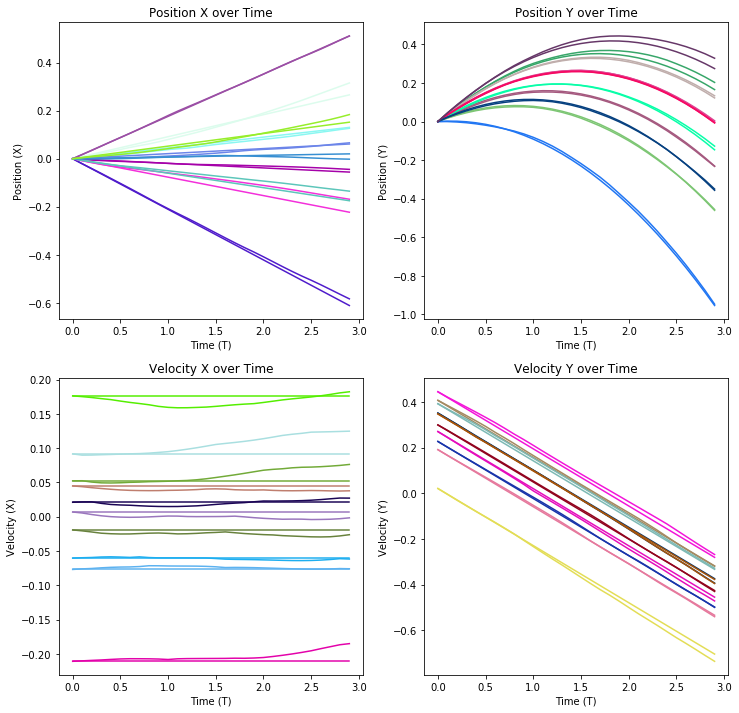

In [144]:
T = np.arange(0,3,0.1)
plt.figure(num=None, figsize=(12, 12))
plt.subplot(2, 2, 1)
for px in Px:
    c = [np.random.random_sample(),np.random.random_sample(),np.random.random_sample()]
    plt.plot(T,[i[0] for i in px],color=c)
    plt.plot(T,[i[1] for i in px],color=c)
plt.xlabel("Time (T)")
plt.ylabel("Position (X)")
plt.title("Position X over Time")
plt.subplot(2, 2, 2)
for py in Py:
    c = [np.random.random_sample(),np.random.random_sample(),np.random.random_sample()]
    plt.plot(T,[i[0] for i in py],color=c)
    plt.plot(T,[i[1] for i in py],color=c)
plt.xlabel("Time (T)")
plt.ylabel("Position (Y)")
plt.title("Position Y over Time")
plt.subplot(2, 2, 3)
for vx in Vx:
    c = [np.random.random_sample(),np.random.random_sample(),np.random.random_sample()]
    plt.plot(T,[i[0] for i in vx],color=c)
    plt.plot(T,[i[1] for i in vx],color=c)
plt.xlabel("Time (T)")
plt.ylabel("Velocity (X)")
plt.title("Velocity X over Time")
plt.subplot(2, 2, 4)
for vy in Vy:
    c = [np.random.random_sample(),np.random.random_sample(),np.random.random_sample()]
    plt.plot(T,[i[0] for i in vy],color=c)
    plt.plot(T,[i[1] for i in vy],color=c)
plt.xlabel("Time (T)")
plt.ylabel("Velocity (Y)")
plt.title("Velocity Y over Time")
plt.show()

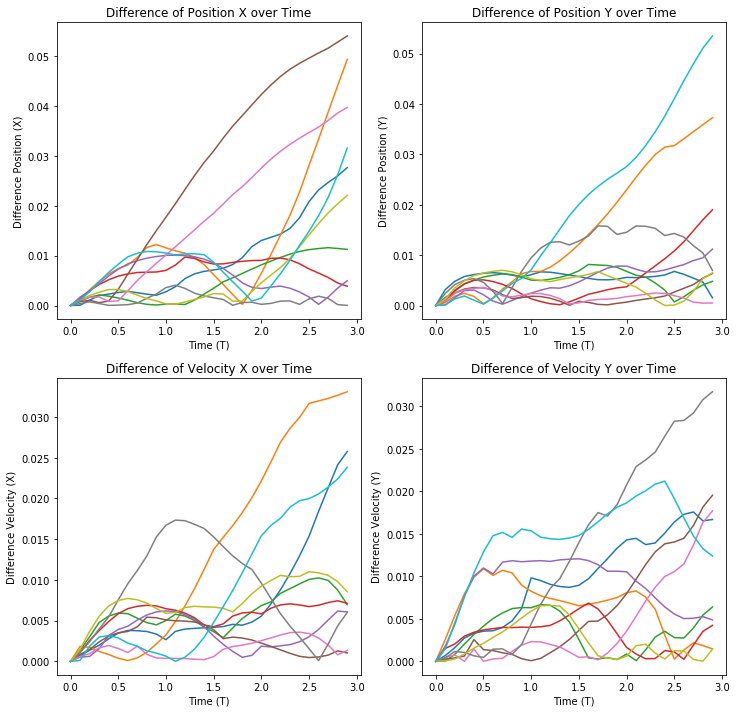

In [145]:
plt.figure(num=None, figsize=(12, 12))
plt.subplot(2, 2, 1)
for px in Px:
    plt.plot(T,[abs(i[0]-i[1]) for i in px])
plt.xlabel("Time (T)")
plt.ylabel("Difference Position (X)")
plt.title("Difference of Position X over Time")
plt.subplot(2, 2, 2)
for py in Py:
    plt.plot(T,[abs(i[0]-i[1]) for i in py])
plt.xlabel("Time (T)")
plt.ylabel("Difference Position (Y)")
plt.title("Difference of Position Y over Time")
plt.subplot(2, 2, 3)
for vx in Vx:
    plt.plot(T,[abs(i[0]-i[1]) for i in vx])
plt.xlabel("Time (T)")
plt.ylabel("Difference Velocity (X)")
plt.title("Difference of Velocity X over Time")
plt.subplot(2, 2, 4)
for vy in Vy:
    plt.plot(T,[abs(i[0]-i[1]) for i in vy])
plt.xlabel("Time (T)")
plt.ylabel("Difference Velocity (Y)")
plt.title("Difference of Velocity Y over Time")
plt.show()